# Simulate random numbers distribution with Markov Chain Monte Carlo Metropolis-Hastings algorithm.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

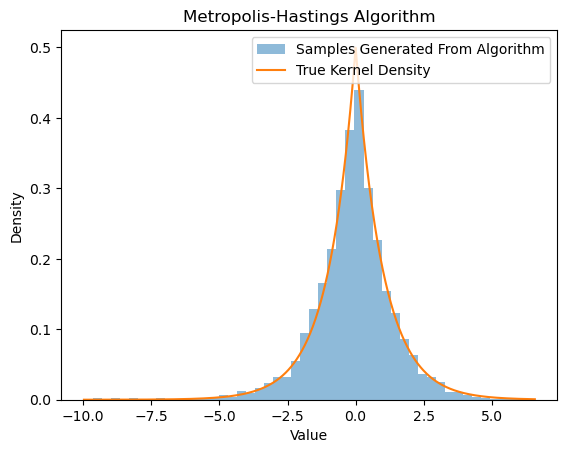

In [4]:
# question 1a

# creating pdf of x
def f(x):
    return 0.5*np.exp(-np.abs(x))

# metropolis-hastings algorithm
def metropolis_hastings(x0, N, s):
    samples = np.zeros(N)
    current_x = x0 ## starting with x0 as xi-1

    for i in range (1,N):
        # step 1: simulating random x that is X*~(Xi-1, s)
        simulated_x = np.random.normal(loc=current_x, scale=s)
        
        # step 2: computing r ratio of f(x*)/f(xi-1)
        r_ratio = f(simulated_x)/f(current_x)
        
        # step 3: generating random number u that is U~(0,1)
        u = np.random.uniform(0,1)
        
        # step 4: if ratio is larger than u, keep. if not, go next
        if np.log(u) < np.log (r_ratio):
            current_x = simulated_x
            
        samples[i] = current_x
        
    return samples

# setting up variable and parameters 
x0 = 1 ## first explanatory variable
N = 10000 ## sample size
s = 1 ## sd/scale

# calling algorithm samples
samples = metropolis_hastings(x0, N, s)

# visualize the results
plt.hist(samples, bins=50, density=True, alpha=0.5, label='Samples Generated From Algorithm')
x_range = np.linspace(min(samples), max(samples), 1000)
plt.plot(x_range, f(x_range), label='True Kernel Density')
plt.title('Metropolis-Hastings Algorithm')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

# mean and sd of samples
sample_mean = np.mean(samples)
sample_std = np.std(samples)

<function R_Hat at 0x0000018DB4AE27A0>


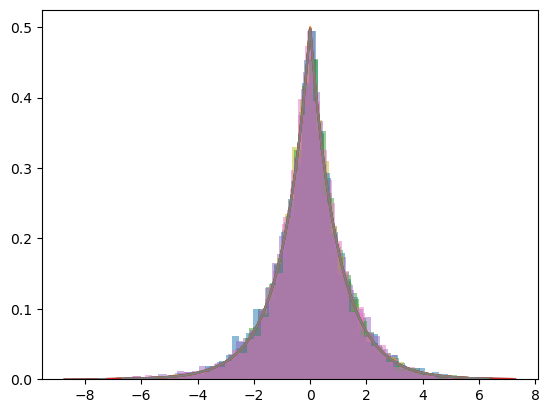

In [27]:
# question 1b

# setting up variable and parameter for chains
J = 9 ## no. of chains
x0j = np.random.uniform(1,9, size=J) ## random initial value between 0 and J

# creating J number of chains
chain = [metropolis_hastings(x0j[j],N,s) for j in range(J)]

# defining Mj, Vj, W, M, B, R_Hat
def Mj(chain):
    return np.sum(chain) / N

def Vj(chain):
    return np.sum((chain-Mj(chain))**2) / N

def W(chain):
    return np.sum(Vj(chain)) / J 

def M(chain):
    return np.sum(Mj(chain))/J

def B(chain):
    return npsum(Mj(chain)-M)**2 / J

def R_Hat(chain):
    return np.sqroot((B+W) / W)

# printing R_Hat value
print(R_Hat)
    
# visualize the results for each chain
for j in range(J):
    plt.hist(chains[j], bins=50, density=True, alpha=0.5, label=f'Chain {j+1}')
    x_range = np.linspace(min(chains[j]), max(chains[j]), 1000)
    plt.plot(x_range, f(x_range), label='True Density')